# 【实验】第6.4节实验2自定义词云图

## 实验介绍

在本节实验中，我们将详细介绍如何根据文本语料中的词频或者权重值来对每个词进行可视化，并使用自定义的背景。

### 知识点

- 文本预处理与词频统计
- WordCloud使用方式之自定义词云图

## 自定义词云图

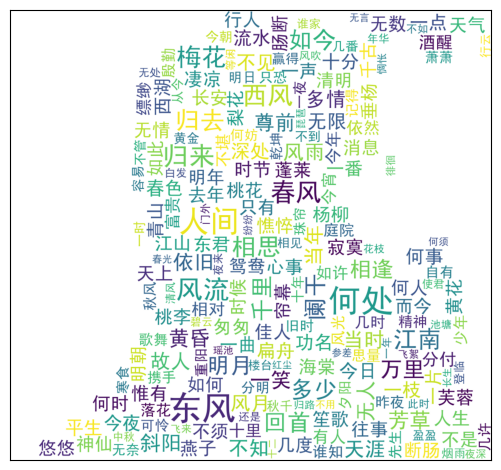

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jieba
import re
import numpy as np


def clean_str(string, sep=" "):
    """
    该函数的作用是去掉一个字符串中的所有非中文字符
    :param string: 输入必须是字符串类型
    :param sep: 表示去掉的部分用什么填充，默认为一个空格
    :return: 返回处理后的字符串
    example:
    s = "祝你2018000国庆快乐！"
    print(clean_str(s))# 祝你 国庆快乐
    print(clean_str(s,sep=""))# 祝你国庆快乐
    """
    string = re.sub(r"[^\u4e00-\u9fff]", sep, string)
    string = re.sub(r"\s{1,}", sep, string)  # 若有空格，则最多只保留1个宽度
    return string.strip()


def load_data_and_cut(file_path='./data/QuanSongCi.txt'):
    cut_words = ""
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            line = line.strip('\n')
            if len(line) < 20:
                continue
            seg_list = jieba.cut(clean_str(line), cut_all=False)
            cut_words += (" ".join(seg_list))
        all_words = cut_words.split()
    return all_words


def get_words_freq(all_words, top_k=500):
    c = Counter()
    for x in all_words:
        if len(x) > 1 and x != '\r\n':
            c[x] += 1
    vocab = {}
    for (k, v) in c.most_common(top_k):
        vocab[k] = v
    return vocab


def show_word_cloud(word_fre):
    from PIL import Image
    img = Image.open('./data/dufu.png')
    img_array = np.array(img)
    word_cloud = WordCloud(font_path='./data/simhei.ttf',
                           background_color='white', max_font_size=70, mask=img_array)
    word_cloud.fit_words(word_fre)
    plt.imshow(word_cloud)
    plt.xticks([])  # 去掉横坐标
    plt.yticks([])  # 去掉纵坐标
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    all_words = load_data_and_cut()
    words_freq = get_words_freq(all_words)
    show_word_cloud(words_freq)


## 实验总结

在本节实验中，我们详细介绍了如何根据文本语料中的词频或者权重值来对每个词进行可视化，并使用自定义的图片背景。